In [1]:
import time
import warnings

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import scipy.cluster.hierarchy as shc
from scipy.spatial.distance import cdist

import sklearn
from sklearn import cluster, datasets, mixture, metrics

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs, make_circles, make_moons
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

In [2]:
print(sklearn.__version__)

0.20.3


# 1.Clustering

---------------------------------------

## a. K-means

------------------

### KMeans(n_clusters, init, n_init, max_iter, precompute_distances, algorithm)
*  Return an K-means clustering object.
 
* #### Arguments:
 1.    n_clusters: number of clusters/number of centroids.Default value: 8
 2.    init: method for initialization of clusters. 
   * "random": choose k observations at random from data;
   * "k-means++": "smart" cluster initialization, speed up convergence
 3.    n_init: number of times algorithm runs with different centroid seeds. Default value: 10
 4.     max_iter: number of iterations for a single run. Default value: 300
 5.  precompute_distances: whether to precompute the distances (faster but more memory)

*  #### Attributes (of the K-means clustering object):
 *    cluster_centers_: array [n_clusters, n_featers]
 *    labels_: labels of each point
 *    inertia: sum of squared distances of samples to their closest cluster center
 *    n_iter : number of iterations run

*  #### Methods (on the K-means clustering object)
 *    fit(X) : compute K-means clustering for dataset X
 *    fit_predict(X): compute K-means clustering and return cluster indices for samples in X
 *    predict(X): return the index of the closest cluster each sample in X belongs to 

[1 1 1 1 1 1 1 0 0 0 0 0 0 0]
[0]


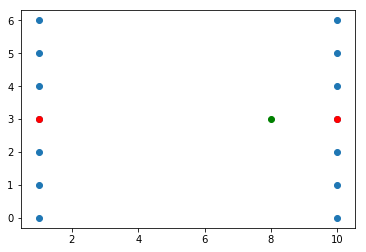

In [3]:
# Exercises:
#Ex 1.a.1

## Data
X = np.array([[1, 0], [1, 1], [1, 2], [1, 3], [1, 4], [1, 5], [1, 6],
              [10, 0], [10, 1], [10, 2], [10, 3], [10, 4], [10, 5], [10, 6]])

# Compute K-means clustering
### YOUR CODE HERE (Fill in the "None")
# Hint: k-means is a K-means clustering object of 2 clusters, random initialization of clusters, 50 iterations
kmeans = KMeans(n_clusters = 2, init = "random", max_iter = 50)

# compute K-means clustering for dataset X
kmeans = kmeans.fit(X)

# Print out the labels of samples in X
# Hint: which attribute of the K-means object should we use?
print(kmeans.labels_)
### END OF YOUR CODE

# Plot the cluster centers
# Hint: which attribute of the K-means object should we use?
centers = kmeans.cluster_centers_
plt.plot(centers[:, 0], centers[:, 1], 'ro')

# Predict label of the point [8, 3]
# Hint: which function should we use?
# Hint :when filling argument of the function, set of samples should be a matrix, each sample is a row
print(kmeans.predict([[8, 3]]))
plt.plot(8, 3, 'go')
### END OF YOUR CODE

#Visualization
plt.scatter(X[:, 0], X[:, 1])
plt.show()

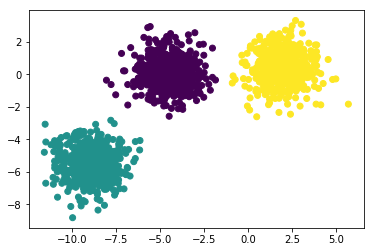

In [4]:
#Ex 1.a.2
## Data
n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

# Compute K-means clustering
### YOUR CODE HERE (Fill in the "None")
# Hint: define a K-means object. Get the appropriate number of clusters.
kmeans = KMeans(n_clusters = 3)
# Hint: compute K-means clustering. Variable "y_pred" should be cluster indices of samples
y_pred = kmeans.fit_predict(X)
### END OF YOUR CODE

## Visualization
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.show()

# 1. Clustering (cont)

---------------------------------

## b. Agglomerative Clustering

-------------------------------------

### AgglomerativeClustering (n_clusters, affinity, linkage)
*  Return an Agglomerative Clustering object.
*  Recursively merge the pair of clusters that minimally increases a given linkage distance.
* #### Arguments:
 1.    n_clusters: number of clusters/number of centroids. Default value: 2
 2,     affinity: metric used to compute the linkage ("euclidean", "l1", "l2", "manhattan", "cosine",....)
 3.    linkage: determines which distance to use between sets of observation. The algorithm merges pairs of cluster minimizing this criterion.
  *              "ward":    : variance of the clusters being merged, only works with affinity "euclidean"
  *             "average"  : average of the distances of each observation of the 2 sets
  *            "complete" : maximum distances between all observations of the 2 sets 
  *             "single"   : minimum distances between all observations of the 2 sets
* #### Attributes (of the Agglomerative clustering object):
 *    n_clusters_: array [n_clusters, n_featers]
 *    labels_: labels of each point
 *    n_leaves: number of leaves in the hierarchical tree
* #### Methods (on the Agglomerative clustering object)
 *    fit(X) : compute Agglomerative clustering for dataset X and return an Agglomerative Clusting object with attributes
 *    fit_predict(X): compute Agglomerative clustering for dataset X and return cluster indices for samples in X

In [5]:
# EXERCISES
# Ex.1.b.1: Choosing the number of clusters in Agglomerative clustering
# Please make sure that you have "shopping-data.csv" stored in the same folder as this notebook.
# This file contains shopping data of customers. Suppose our task is to segment customers based on their shopping patterns.
customer_data = pd.read_csv('shopping-data.csv')  

# Before we start, let's explore more about this dataset

## Shape of the dataset
print(customer_data.shape)

## Print the first 5 data items
customer_data.head()

(200, 5)


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


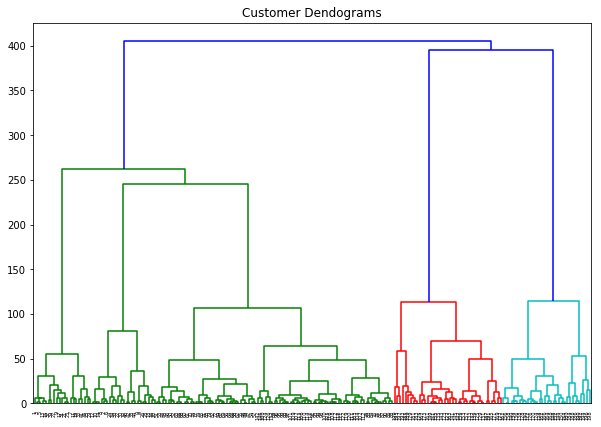

In [6]:
# Ex.1.b.1: Choosing the number of clusters in Agglomerative clustering (cont)
# We suspect that the last two entries could be used for clustering
# Extract the last 2 columns
data = customer_data.iloc[:, 3:5].values  

# Use dendrogram to visualize hierarchical clustering for this dataset
plt.figure(figsize=(10, 7))  
plt.title("Customer Dendograms")  
dend = shc.dendrogram(shc.linkage(data, method='ward'))  

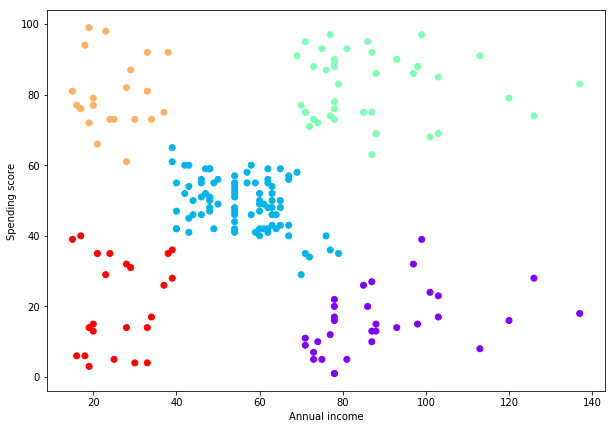

In [7]:
# Ex.1.b.1: Choosing the number of clusters in Agglomerative clustering (cont)

# Now, let's make use of the Dendrogram to sucessfully apply Agglomerative clustering 
# QUESTION: Based on the dendrogram above, what would be the appropriate number of clusters? 
# ANSWER: 5 would be a reasonable choice

# Compute Agglomerative Clustering
### YOUR CODE HERE (Fill in the "None")
# Hint: define an Agglomerative Clustering object
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward') # only linkage "ward" and "complete" work fine
# Hint: compute Agglomerative Clustering for our dataset
## both fit() and fit_predict() work fine
#cluster.fit(data)
cluster.fit_predict(data)
### END OF YOUR CODE

# Visualization
plt.figure(figsize=(10, 7))  
plt.xlabel("Annual income")
plt.ylabel("Spending score")
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')  

# QUESTION: Can you try with different number of clusters and visually compare the results?

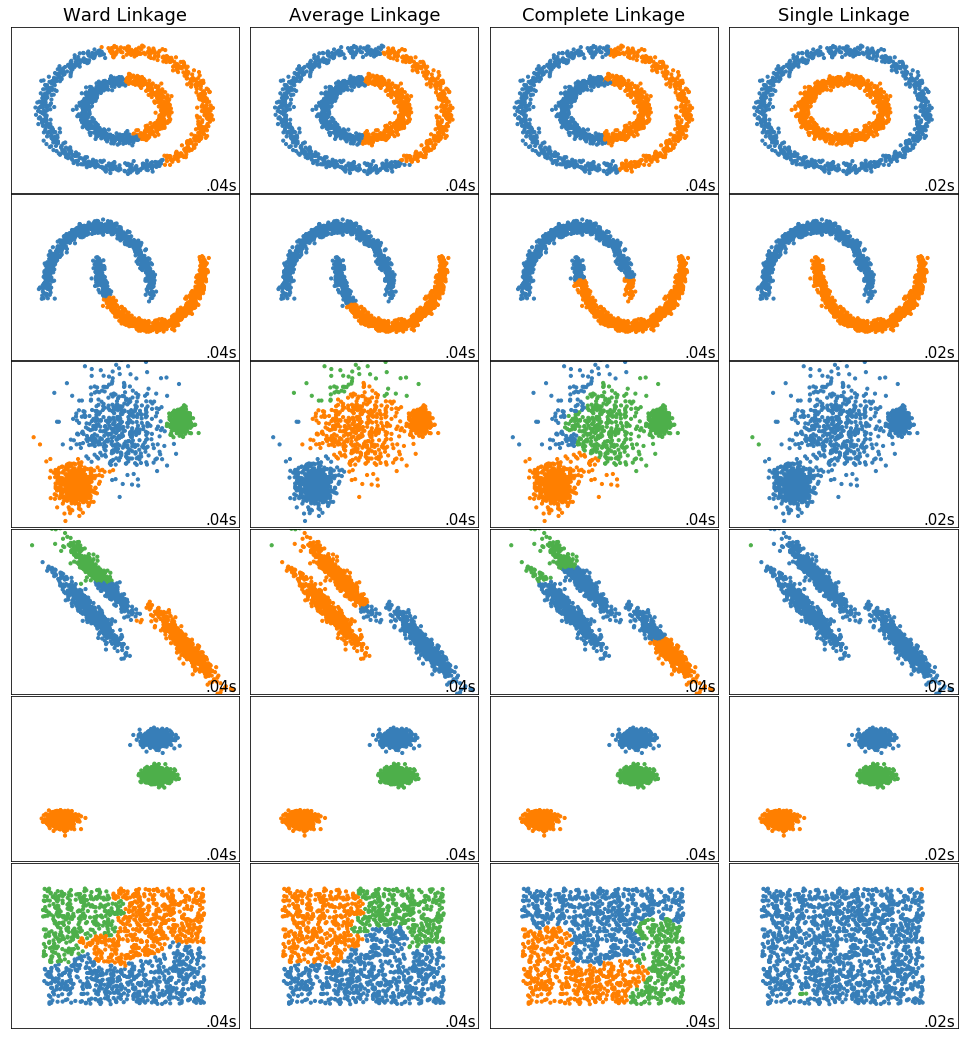

In [8]:
# EXERCISE
# Ex.1.b.2: Visualiation of effects of linkage on clustering result

# Number of samples in each sample set
n_samples = 1500

# Create datasets of particular shapes
noisy_circles = make_circles(n_samples=n_samples, factor=.5,noise=.05)    # circles
noisy_moons = make_moons(n_samples=n_samples, noise=.05)                  # moons
blobs = make_blobs(n_samples=n_samples, random_state=8)                   # blobs
no_structure = np.random.rand(n_samples, 2), None                         # no structure

# Anisotropicly distributed data
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)                                                      # anisotropic

# blobs with varied variances
varied = make_blobs(n_samples=n_samples,                                  # blobs with varied variances
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)

### IMPORTANT: these give insights about our datasets
default_base = {'n_neighbors': 10,
                'n_clusters': 3}

SampleSets = [
    (noisy_circles, {'n_clusters': 2}),
    (noisy_moons, {'n_clusters': 2}),
    (varied, {'n_neighbors': 2}),
    (aniso, {'n_neighbors': 2}),
    (blobs, {}),
    (no_structure, {})]
### 

# Set up cluster parameters
plt.figure(figsize=(9 * 1.3 + 2, 14.5))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
                    hspace=.01)

plot_num = 1


for i_dataset, (sampleset, algo_params) in enumerate(SampleSets):
    
    X, y = sampleset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # ============
    # Create cluster objects
    
    # update parameters with dataset-specific values
    # Recall IMPORTANT section, each dataset has its own structure in terms of number of clusters
    params = default_base.copy()
    params.update(algo_params)
    
    # Define Agglomerative Clustering objects
    ### YOUR CODE HERE (fill in the "None")
    # Hint: How to set the AgglomerativeClustering object adaptive to structure of each particular dataset?
    # Hint: changes of affinity do not affect the result in most cases
    # Hint: the variable name suggests the type of Agglomerative Clustering we are defining
    ward = AgglomerativeClustering(n_clusters=params['n_clusters'], linkage='ward')  # ward only works with affinity "euclidean"
    average = AgglomerativeClustering(n_clusters=params['n_clusters'], affinity = "l2", linkage='average')  # any affinity is fine
    complete = AgglomerativeClustering(n_clusters=params['n_clusters'], affinity = "l2", linkage='complete')# any affinity is fine
    single = AgglomerativeClustering(n_clusters=params['n_clusters'], affinity = "l2", linkage='single')    # any affinity is fine
    ### END OF YOUR CODE

    clustering_algorithms = (
        ('Ward Linkage', ward),
        ('Average Linkage', average),
        ('Complete Linkage', complete),
        ('Single Linkage', single)
    )

    for name, algorithm in clustering_algorithms:
        t0 = time.time()

        # catch warnings related to kneighbors_graph
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the " +"connectivity matrix is [0-9]{1,2}" +
                " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning)
            algorithm.fit(X)

        t1 = time.time()
        
        # Prediction
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(np.int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(len(SampleSets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)
        
        # Visualization
        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                 transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')
        plot_num += 1

plt.show()

# 1. Clustering (cont)
----------------------
## c. Density-based spatial clustering of applications with noise (DBSCAN)
----------------------

### DBSCAN(eps, min_samples, metric, leaf_size)
* Return an DBSCAN clustering object.
* Find core samples of high density and expand clusters from them. Good for data which contains clusters of similar density.
* #### Arguments:
 1.     eps: maximum distance between 2 samples for one to be considered as in the neighborhood of the other. NOT maximum bound on the distances of points within a cluster.
 2.    min_samples: the number of samples in a neighborhood for a point to be considered as a core point. Inclues the point itself. controls the level of tolerance of the algorithms towards noise.
 3.    metric: metric used to calculated the distance ("euclidean", "cosine", "l1", "l2", "manhattan",....)

* ##### Attributes (of the DBSCAN clustering object):
 *    core_sample_indices: indices of core samples
 *    components: copy of each core sample found by training
 *    labels_: cluster labels for each point in the dataset given to fit(). Noises labeled (-1)

* #### Methods (on the DBSCAN clustering object)
 *    fit(X) : compute DBSCAN clustering for dataset X and return a DBSCAN clustering object with attributes
 *    fit_predict(X): compute clustering for dataset X and return cluster labels (as an array)

Estimated number of clusters: 3
Estimated number of noise points: 18


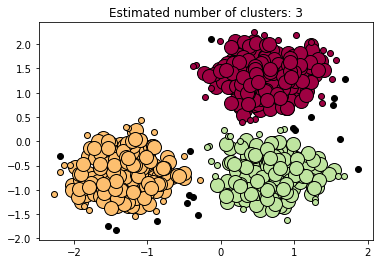

In [9]:
# EXERCISE
# Ex.1.c.1: DBSCAN practice

# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

### Standardize features by removing the mean and scaling to unit variance
X = StandardScaler().fit_transform(X)


# Compute DBSCAN clustering. 
# At this point, I expect that all attendees are familiar with our "common procedure" when compute any kind of clustering
#                Just in case, please remind them about these 2 steps if necessary.
#                Step 1: define a clustering object
#                Step 2: compute clustering on the dataset by calling an appropriate function on the object
### YOUR CODE HERE
# Hint: do grid-search on [0,0.5] to find good "eps"; try several "min_samples" to see the effect on the black points (noises)
dbscan = DBSCAN(eps=0.3, min_samples=10, metric = "euclidean")      ## This one looks best
# Hint: db has attributes, choose the appropriate function
db = dbscan.fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
# Hint: variable "labels" should contain the labels of our samples
labels = db.labels_
### END OF YOUR CODE

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)


# Plot result

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

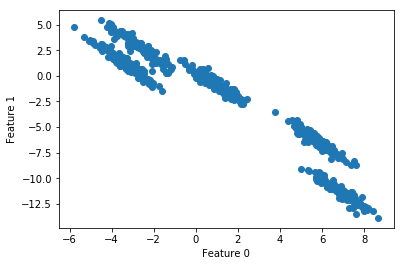

In [10]:
# Ex.1.c.2: DBSCAN vs. K-means vs. Agglomerative
# One issue with K-means and Agglomerative clustering is that they assume all directions are equally important.
# Unfortunately, directions are not always equally important. This exercise explores 1 such example.

# generate some random cluster data
X, y = make_blobs(random_state=170, n_samples=600, centers = 5)
rng = np.random.RandomState(74)
# transform the data to be stretched
transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)
# plot
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

Text(0, 0.5, 'Feature 1')

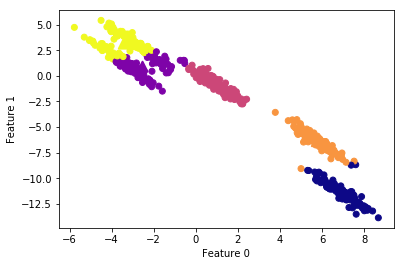

In [11]:
# Ex.1.c.2: DBSCAN vs. k-means vs. Agglomerative (cont)
# As you can see, we have clusters with a stretched diagonal shape.
# QUESTION: what would be the appropriate number of clusters?
# Answer: 5 would be a reasonable choice.

# Let's see how well K-means and Agglomerative clustering techniques work in this case

### Compute K-means clustering for dataset X
### YOUR CODE HERE (Fill in the "None"). 2 lines of code
# Hint: make sure that variable "y_pred" is the array of cluster indices
kmeans = KMeans(n_clusters=5)
y_pred = kmeans.fit_predict(X)
### END OF YOUR CODE.

# plot the cluster assignments and cluster centers
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap="plasma")
plt.scatter(kmeans.cluster_centers_[:, 0],   
            kmeans.cluster_centers_[:, 1],
            marker='^', 
            c=[0, 1, 2, 3, 4], 
            s=100, 
            linewidth=2,
            cmap="plasma")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

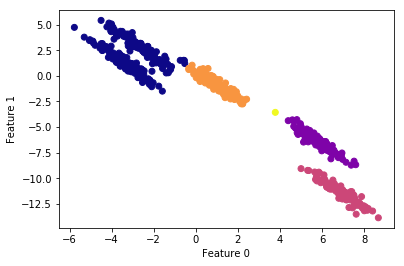

In [12]:
# Ex.1.c.2: DBSCAN vs. k-means vs. Agglomerative (cont)

### Compute Agglomerative clustering for dataset X
### YOUR CODE HERE (Fill in the "None"). 2 lines of code
agglomerative = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='average') # all 4 linkage types work not well
y_pred = agglomerative.fit_predict(X)
### END OF YOUR CODE.

# plot the cluster assignments and cluster centers
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap="plasma")

plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

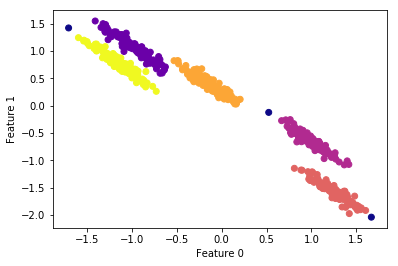

In [13]:
# Ex.1.c.2: DBSCAN vs. k-means vs. Agglomerative (cont)

### Standardize features by removing the mean and scaling to unit variance
X = StandardScaler().fit_transform(X)
# Attendees may question that this is not a fair judgement since only DBSCAN has this line. If so, ask them to add this line 
# before computing K-means or Agglomerative clustering, it would not improve the performance :)

### YOUR CODE HERE (Fill in the "None"). 2 lines of code
dbscan = DBSCAN(eps=0.123, min_samples = 2)
y_pred = dbscan.fit_predict(X)
### END OF YOUR CODE

# plot the cluster assignments
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap="plasma")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

# QUESTION: What do you see from the results of 3 clustering techiques on this problem?
# ANSWER: It is (almost) obvious that DBSCAN performs the best in this problem.

# 1. Clustering (cont) - OPTIONAL (if time permits)
------------------------
## d. Expectation Maximization (on Gaussian Mixture Model)
------------------------
 Can be understood as a probabilistic extention of K-means clustering 
 i.e., each sample has a probability distribution over possible labels

### GaussianMixture(n_components, covariance_type, max_iter)
* Return a Gaussian Mixture object.
*  Representation of a Gaussian mixture model probability distribution.
* #### Arguments:
 1.    n_components: the number of mixture components (a component is a Gaussian)
 2.    covariance_type: type of covariance parameters to use. Must be one of:
  *                    "full"      : each component has its own general covariance matrix
  *                   "tied"      : all components share the same general covariance matrix
  *                   "diag"      : each component has its own diagonal covariance matrix
  *                   "spherical" : each component has its own single variance
  *    max_iter: the number of Expectation-Maximization iterations to perform

* ####  Attributes (of the Gaussian Mixture object):
 *    weights_: weights of each mixture component.
 *    means_: mean of each mixture component
 *    covariances_: the covariance of each mixture component. 

* #### Methods (on the Gaussian Mixture object)
 *    fit(X) : estimate model parameters with the Expectation-Maximization for dataset X
 *    fit_predict(X): estimate model parameters and predict the labels for dataset X

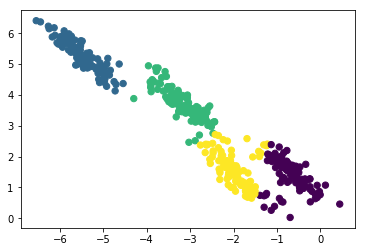

In [14]:
# EXERCISE:
# Ex.1.d.1: Gaussian Mixture vs. K-means

# Data:
X, y_true = make_blobs(n_samples=400, centers=4,
                       cluster_std=0.60, random_state=0)
X = X[:, ::-1] # flip axes for better plotting
rng = np.random.RandomState(13)
X_sketched = np.dot(X, rng.randn(2, 2))


# Computer K-means clustering on X_sketched
### YOUR CODE HERE (Fill in the "None"). 2 lines of code
# Hint: make sure that variable "labels" is the array of cluster indices of samples in X_ketched
kmeans = KMeans(4, random_state=0)
labels = kmeans.fit_predict(X_sketched)
### END OF YOUR CODE


# Plot the data
plt.scatter(X_sketched[:, 0], X_sketched[:, 1], c=labels, s=40, cmap='viridis');

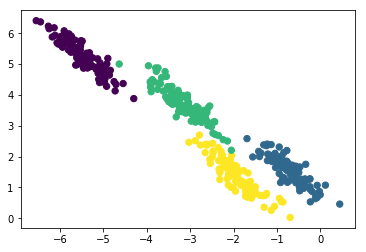

In [15]:
# Ex.1.d.1: Gaussian Mixture vs. K-means (cont)

# Computer Expectation-Maximization on X_sketched
### YOUR CODE HERE (Fill in the "None"). 2 lines of code
gmm = GaussianMixture(n_components=4)
labels = gmm.fit_predict(X_sketched)
### END OF YOUR CODE.

# Plot the data
plt.scatter(X_sketched[:, 0], X_sketched[:, 1], c=labels, s=40, cmap='viridis');

## Reference
1. https://scikit-learn.org/
2. https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/
3. https://towardsdatascience.com/dbscan-clustering-for-data-shapes-k-means-cant-handle-well-in-python-6be89af4e6ea
4. https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html